[0]
⇩は訓練用とテスト用を横に並べて比較している
[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]]
⇩は混合行列を作成している
[[5 0]
 [1 1]]
訓練用データセットの可視化


/tmp/ipython-input-3153064482.py:88: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


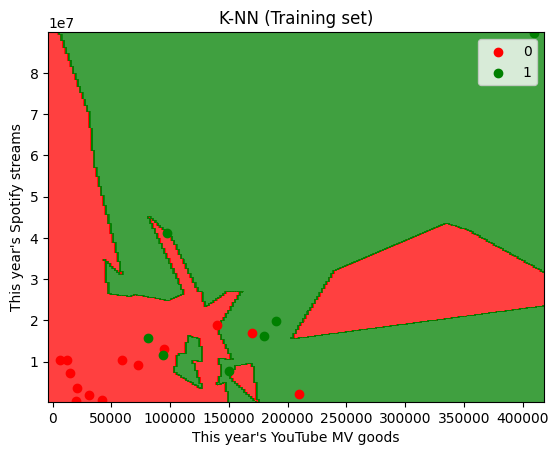

テスト用データセットの可視化


/tmp/ipython-input-3153064482.py:108: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


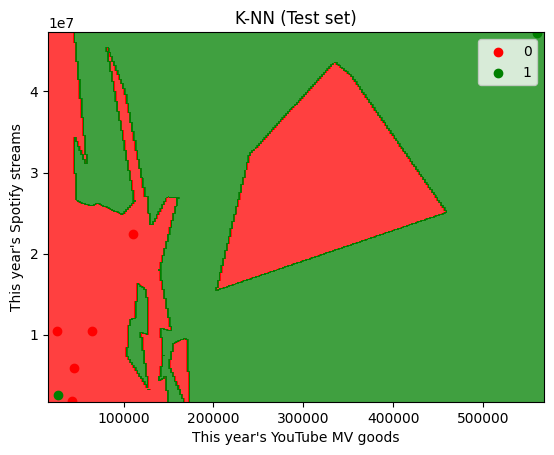

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 20)
dt = pd.read_csv('artists2.csv')
dt["This_year's_Top_MV_goods"] = (
    dt["This_year's_Top_MV_goods"]
    .fillna(dt["This_year's_Top_MV_goods"].median())
)
dt["This_year's_Top_spotify_streams"] = (
    dt["This_year's_Top_spotify_streams"]
    .fillna(dt["This_year's_Top_spotify_streams"].median())
)
X = dt[
    ["This_year's_Top_MV_goods","This_year's_Top_spotify_streams"]].values

y = dt["kohaku_selected"].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
#n_neighbors➡多数決で使う周辺のデータはいくつにするのか
#p＝2➡2次元
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

print(classifier.predict(sc.transform([[110000,5000000]])))

y_pred = classifier.predict(X_test)
print("⇩は訓練用とテスト用を横に並べて比較している")
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
#concatenate =「配列どうしを“くっつける”関数」
#最後の１は(A,B)のAとBを「どの方向にくっつけるか」 を指定してる。
#axis=0（0方向）＝ 縦方向に追加（行方向）
#axis=1（1方向）＝ 横方向に追加（列方向）

print("⇩は混合行列を作成している")
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

print("訓練用データセットの可視化")

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(
    np.arange(X_set[:, 0].min() - 10000, X_set[:, 0].max() + 10000, 2000),
    np.arange(X_set[:, 1].min() - 100000, X_set[:, 1].max() + 100000, 2000)
)

"""
平面に点を敷く
   ↓
全部KNNに分類
   ↓
分類結果を色に変換
   ↓
色で塗る

"""

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

"""
⇩
グラフの表示範囲（地図の端）を、さっき作った格子の範囲にピッタリ合わせるコード
plt.xlim(X1.min(), X1.max())

xlim = x-axis limit（x軸の範囲）

X1.min() = 左端

X1.max() = 右端

👉 横軸を「X1で作った範囲いっぱい」に表示
"""
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel("This year's YouTube MV goods")
plt.ylabel("This year's Spotify streams")
plt.legend()
plt.show()

print("テスト用データセットの可視化")

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(
    np.arange(X_set[:, 0].min() - 10000, X_set[:, 0].max() + 10000, 2000),
    np.arange(X_set[:, 1].min() - 100000, X_set[:, 1].max() + 100000, 2000)
)
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel("This year's YouTube MV goods")
plt.ylabel("This year's Spotify streams")
plt.legend()
plt.show()

"""
K近傍法（KNN）を用いて、アーティストが紅白歌合戦に選出されるかどうかを、
今年のYouTubeで最もいいね数を獲得したMVと、Spotifyで最も再生数が多かった楽曲の再生数から分析した。
ロジスティック回帰と同じデータを用いたところ、KNNでは正解率がより高くなった。

可視化結果から、一定以上のいいね数や再生数が選出に関係している傾向は確認できたが、
決定領域が不自然に分断される部分も見られ、分類結果が不安定であることが分かった。
このことから、紅白選出には再生数やいいね数以外にも多様な要因が関与していると考えられる。
本分析を通じて、モデルの性能だけでなく結果の解釈が重要であることを学んだ。
"""

